In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
car_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

my_frame = pd.read_csv('car.csv', names = car_cols)
my_frame.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [5]:
my_frame.shape

(1728, 6)

In [6]:
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [7]:
my_frame.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,low,low,2,2,small,low
freq,432,432,432,576,576,576


In [8]:
my_frame.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

In [9]:
my_frame.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

<AxesSubplot:>

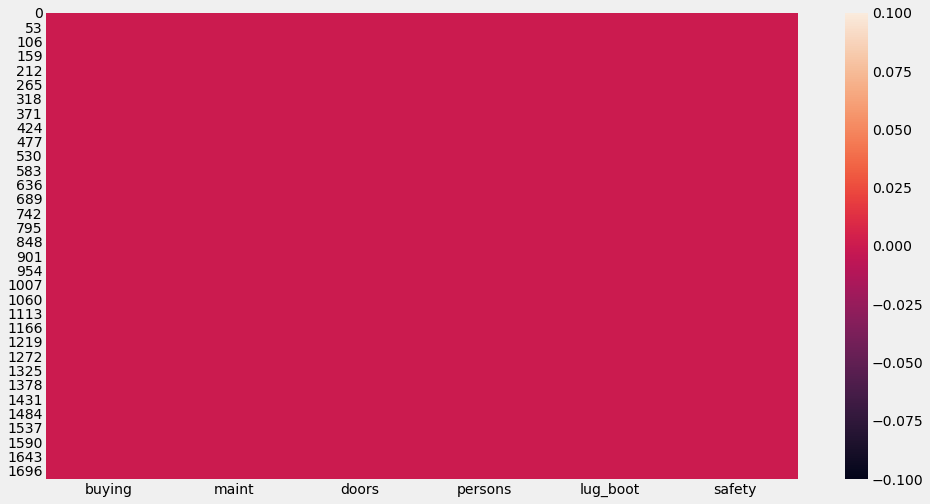

In [10]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize = (15, 8))
sns.heatmap(my_frame.isnull(), cbar = True)

In [11]:
my_frame.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [12]:
encode_non_numeric = pd.get_dummies(my_frame, columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encode_non_numeric.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [15]:
encode_non_numeric.shape

(1728, 21)

In [16]:
encode_non_numeric.dtypes

buying_high       uint8
buying_low        uint8
buying_med        uint8
buying_vhigh      uint8
maint_high        uint8
maint_low         uint8
maint_med         uint8
maint_vhigh       uint8
doors_2           uint8
doors_3           uint8
doors_4           uint8
doors_5more       uint8
persons_2         uint8
persons_4         uint8
persons_more      uint8
lug_boot_big      uint8
lug_boot_med      uint8
lug_boot_small    uint8
safety_high       uint8
safety_low        uint8
safety_med        uint8
dtype: object

In [17]:
car_data = encode_non_numeric

In [18]:
car_data.dtypes

buying_high       uint8
buying_low        uint8
buying_med        uint8
buying_vhigh      uint8
maint_high        uint8
maint_low         uint8
maint_med         uint8
maint_vhigh       uint8
doors_2           uint8
doors_3           uint8
doors_4           uint8
doors_5more       uint8
persons_2         uint8
persons_4         uint8
persons_more      uint8
lug_boot_big      uint8
lug_boot_med      uint8
lug_boot_small    uint8
safety_high       uint8
safety_low        uint8
safety_med        uint8
dtype: object

In [19]:
car_data.shape

(1728, 21)

## train test split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
x = car_data.drop(['buying_low', 'buying_high', 'buying_med', 'buying_med'], axis = 1)
y = car_data['buying_med']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [47]:
x_test.head()

,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
853,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
1556,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
133,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
31,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1506,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0


In [48]:
y_test.head()

853     0
1556    0
133     0
31      0
1506    0
Name: buying_med, dtype: uint8

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lR_model = LogisticRegression()

In [51]:
lR_model.fit(x_train, y_train)

LogisticRegression()

In [52]:
lR_y_pred = lR_model.predict(x_test)

In [53]:
print(classification_report(y_test, lR_y_pred))
print(confusion_matrix(y_test, lR_y_pred))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lR_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       247
           1       0.00      0.00      0.00        99

    accuracy                           0.71       346
   macro avg       0.36      0.50      0.42       346
weighted avg       0.51      0.71      0.59       346

[[247   0]
 [ 99   0]]

Logistic Regression Accuracy: 71.38728323699422


G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [54]:
from sklearn.svm import SVC

In [55]:
svc_model = SVC(kernel = 'linear')

In [56]:
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [57]:
svc_y_pred = svc_model.predict(x_test)

In [58]:
print(classification_report(y_test, svc_y_pred))
print(confusion_matrix(y_test, svc_y_pred))
print("\nSVM Accuracy:", accuracy_score(y_test, svc_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       247
           1       0.00      0.00      0.00        99

    accuracy                           0.71       346
   macro avg       0.36      0.50      0.42       346
weighted avg       0.51      0.71      0.59       346

[[247   0]
 [ 99   0]]

SVM Accuracy: 71.38728323699422


G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\MyPython3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb_model = GaussianNB()

In [61]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [62]:
nb_y_pred = nb_model.predict(x_test)

In [63]:
print(classification_report(y_test, nb_y_pred))
print(confusion_matrix(y_test, nb_y_pred))
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_y_pred) * 100)

              precision    recall  f1-score   support

           0       1.00      0.35      0.52       247
           1       0.38      1.00      0.55        99

    accuracy                           0.53       346
   macro avg       0.69      0.67      0.53       346
weighted avg       0.82      0.53      0.53       346

[[ 86 161]
 [  0  99]]

Naive Bayes Accuracy: 53.46820809248555


## KNearest Neighbor

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn_model = KNeighborsClassifier(n_neighbors = 2)

In [66]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [67]:
knn_y_pred = knn_model.predict(x_test)

In [68]:
print(classification_report(y_test, knn_y_pred))
print(confusion_matrix(y_test, knn_y_pred))
print("\nKNN Accuracy:", accuracy_score(y_test, knn_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       247
           1       0.00      0.00      0.00        99

    accuracy                           0.71       346
   macro avg       0.36      0.50      0.41       346
weighted avg       0.51      0.71      0.59       346

[[245   2]
 [ 99   0]]

KNN Accuracy: 70.8092485549133


## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_model = DecisionTreeClassifier()

In [71]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
dt_y_pred = dt_model.predict(x_test)

In [73]:
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))
print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_y_pred) * 100)

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       247
           1       0.00      0.00      0.00        99

    accuracy                           0.64       346
   macro avg       0.35      0.45      0.39       346
weighted avg       0.49      0.64      0.56       346

[[221  26]
 [ 99   0]]

Decision Tree Accuracy: 63.8728323699422


## Average Accuracy

In [74]:
avg_predict = (lR_y_pred + svc_y_pred + nb_y_pred + knn_y_pred + dt_y_pred) // 5
predict_accuracy = accuracy_score(y_test, avg_predict)
print("Average Prediction of Models:", predict_accuracy * 100)

Average Prediction of Models: 71.38728323699422


## Apply bagging boosting

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss

In [76]:
voting_classifier = VotingClassifier(estimators = [('LR', lR_model), ('SVC', svc_model), ('NB', nb_model), ('KNN', knn_model), ('DTree', dt_model)], voting = 'hard')

In [77]:
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(kernel='linear')),
                             ('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier(n_neighbors=2)),
                             ('DTree', DecisionTreeClassifier())])

In [78]:
voting_y_pred = voting_classifier.predict(x_test)

## Apply KFold

In [79]:
from sklearn.model_selection import KFold, cross_val_score

In [80]:
svm_bagging_model = BaggingClassifier(base_estimator = svc_model, n_estimators = 40, random_state = 14)
dtree_bagging_model = BaggingClassifier(base_estimator = dt_model, n_estimators = 40, random_state = 14)
knn_bagging_model = BaggingClassifier(base_estimator = knn_model, n_estimators = 40, random_state = 14)

In [81]:
def bagging_ensemble(my_model):
    k_folds = KFold(n_splits = 20, random_state = 14, shuffle = True)
    results = cross_val_score(my_model, x_train, y_train, cv = k_folds)
    print('Results:', results.mean())

In [82]:
bagging_ensemble(svm_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(knn_bagging_model)

Results: 0.758944099378882
Results: 0.5759316770186336
Results: 0.6793374741200828


## Apply KFold on number estimators

In [83]:
k_folds = KFold(n_splits = 20, random_state = 14, shuffle = True)
n_estimators = [20, 40, 60, 80, 100]

for i in n_estimators:
    ada_boost = AdaBoostClassifier(n_estimators = i, random_state = 14)
    results = cross_val_score(ada_boost, x_train, y_train, cv = k_folds)
    print('Results for {} estimators:'.format(i))
    print(results.mean())

Results for 20 estimators:
0.758944099378882
Results for 40 estimators:
0.758944099378882
Results for 60 estimators:
0.758944099378882
Results for 80 estimators:
0.758944099378882
Results for 100 estimators:
0.758944099378882
